In [2]:
pip install tf-keras


Note: you may need to restart the kernel to use updated packages.


In [ ]:
import os
from huggingface_hub import login

# Clear existing HF_TOKEN if it exists
if "HF_TOKEN" in os.environ:
    del os.environ["HF_TOKEN"]

# Set the environment variable and log in


os.environ["HF_TOKEN"] = " ###############  "  #create a token in hugging face and replace it here 


login(os.environ["HF_TOKEN"])

import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader
from transformers import BertTokenizer, BertForSequenceClassification, Trainer, TrainingArguments
from sklearn.model_selection import train_test_split

# Load dataset
data = pd.read_json('Sarcasm_Headlines_Dataset_v2.json', lines=True)

# Split data
train_texts, test_texts, train_labels, test_labels = train_test_split(
    data['headline'], data['is_sarcastic'], test_size=0.2, random_state=42
)




Note: Environment variable`HF_TOKEN` is set and is the current active token independently from the token you've just configured.


In [ ]:
# Load tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize data
train_encodings = tokenizer(list(train_texts), truncation=True, padding=True, max_length=64)
test_encodings = tokenizer(list(test_texts), truncation=True, padding=True, max_length=64)

# Custom Dataset class
class SarcasmDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

train_dataset = SarcasmDataset(train_encodings, list(train_labels))
test_dataset = SarcasmDataset(test_encodings, list(test_labels))


In [5]:
pip install accelerate>=0.26.0


Note: you may need to restart the kernel to use updated packages.


In [7]:
# Load BERT model for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=2)

# Training arguments
training_args = TrainingArguments(
    output_dir='./results',          # output directory
    num_train_epochs=3,              # number of training epochs
    per_device_train_batch_size=8,   # batch size for training
    per_device_eval_batch_size=8,    # batch size for evaluation
    warmup_steps=500,                # number of warmup steps for learning rate scheduler
    weight_decay=0.01,               # strength of weight decay
    logging_dir='./logs',            # directory for storing logs
    logging_steps=10,
    evaluation_strategy="epoch"      # Evaluate every epoch
)

# Define Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=test_dataset
)

# Train model
trainer.train()

# Save model for future use
model.save_pretrained('./sarcasm_detector')
tokenizer.save_pretrained('./sarcasm_detector')


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


  0%|          | 0/8586 [00:00<?, ?it/s]

{'loss': 0.7003, 'grad_norm': 5.319445610046387, 'learning_rate': 1.0000000000000002e-06, 'epoch': 0.0}
{'loss': 0.7172, 'grad_norm': 5.8826823234558105, 'learning_rate': 2.0000000000000003e-06, 'epoch': 0.01}
{'loss': 0.7106, 'grad_norm': 8.017109870910645, 'learning_rate': 3e-06, 'epoch': 0.01}
{'loss': 0.703, 'grad_norm': 12.101698875427246, 'learning_rate': 4.000000000000001e-06, 'epoch': 0.01}
{'loss': 0.6686, 'grad_norm': 5.0932207107543945, 'learning_rate': 5e-06, 'epoch': 0.02}
{'loss': 0.6753, 'grad_norm': 5.582006454467773, 'learning_rate': 6e-06, 'epoch': 0.02}
{'loss': 0.6213, 'grad_norm': 7.013598442077637, 'learning_rate': 7.000000000000001e-06, 'epoch': 0.02}
{'loss': 0.6759, 'grad_norm': 6.5755133628845215, 'learning_rate': 8.000000000000001e-06, 'epoch': 0.03}
{'loss': 0.6476, 'grad_norm': 6.770129203796387, 'learning_rate': 9e-06, 'epoch': 0.03}
{'loss': 0.6311, 'grad_norm': 4.9136552810668945, 'learning_rate': 1e-05, 'epoch': 0.03}
{'loss': 0.5516, 'grad_norm': 10.98

  0%|          | 0/716 [00:00<?, ?it/s]

{'eval_loss': 0.3330228328704834, 'eval_runtime': 419.9575, 'eval_samples_per_second': 13.63, 'eval_steps_per_second': 1.705, 'epoch': 1.0}
{'loss': 0.1391, 'grad_norm': 0.21081340312957764, 'learning_rate': 3.5345040811278755e-05, 'epoch': 1.0}
{'loss': 0.1957, 'grad_norm': 0.4420492351055145, 'learning_rate': 3.5283205540440266e-05, 'epoch': 1.01}
{'loss': 0.1986, 'grad_norm': 0.06668255478143692, 'learning_rate': 3.5221370269601784e-05, 'epoch': 1.01}
{'loss': 0.191, 'grad_norm': 3.7674965858459473, 'learning_rate': 3.5159534998763295e-05, 'epoch': 1.01}
{'loss': 0.2522, 'grad_norm': 9.7533540725708, 'learning_rate': 3.509769972792481e-05, 'epoch': 1.02}
{'loss': 0.1655, 'grad_norm': 0.5488782525062561, 'learning_rate': 3.503586445708632e-05, 'epoch': 1.02}
{'loss': 0.2429, 'grad_norm': 22.02373695373535, 'learning_rate': 3.4974029186247834e-05, 'epoch': 1.02}
{'loss': 0.0692, 'grad_norm': 0.19102883338928223, 'learning_rate': 3.491219391540935e-05, 'epoch': 1.03}
{'loss': 0.0084, '

  0%|          | 0/716 [00:00<?, ?it/s]

{'eval_loss': 0.3334280252456665, 'eval_runtime': 424.5534, 'eval_samples_per_second': 13.482, 'eval_steps_per_second': 1.686, 'epoch': 2.0}
{'loss': 0.0666, 'grad_norm': 9.951048851013184, 'learning_rate': 1.7660153351471682e-05, 'epoch': 2.0}
{'loss': 0.0651, 'grad_norm': 0.15266767144203186, 'learning_rate': 1.7598318080633193e-05, 'epoch': 2.01}
{'loss': 0.0016, 'grad_norm': 0.06365662068128586, 'learning_rate': 1.7536482809794707e-05, 'epoch': 2.01}
{'loss': 0.0012, 'grad_norm': 0.026045816019177437, 'learning_rate': 1.747464753895622e-05, 'epoch': 2.01}
{'loss': 0.0461, 'grad_norm': 0.020765330642461777, 'learning_rate': 1.7412812268117735e-05, 'epoch': 2.02}
{'loss': 0.0265, 'grad_norm': 0.026627346873283386, 'learning_rate': 1.735097699727925e-05, 'epoch': 2.02}
{'loss': 0.001, 'grad_norm': 0.36816465854644775, 'learning_rate': 1.7289141726440764e-05, 'epoch': 2.02}
{'loss': 0.074, 'grad_norm': 9.031423568725586, 'learning_rate': 1.7227306455602278e-05, 'epoch': 2.03}
{'loss': 

  0%|          | 0/716 [00:00<?, ?it/s]

{'eval_loss': 0.35113364458084106, 'eval_runtime': 412.1286, 'eval_samples_per_second': 13.889, 'eval_steps_per_second': 1.737, 'epoch': 3.0}
{'train_runtime': 23693.4061, 'train_samples_per_second': 2.899, 'train_steps_per_second': 0.362, 'train_loss': 0.18555881004655683, 'epoch': 3.0}


('./sarcasm_detector\\tokenizer_config.json',
 './sarcasm_detector\\special_tokens_map.json',
 './sarcasm_detector\\vocab.txt',
 './sarcasm_detector\\added_tokens.json')

  0%|          | 0/716 [00:00<?, ?it/s]

Test Accuracy: 0.9350


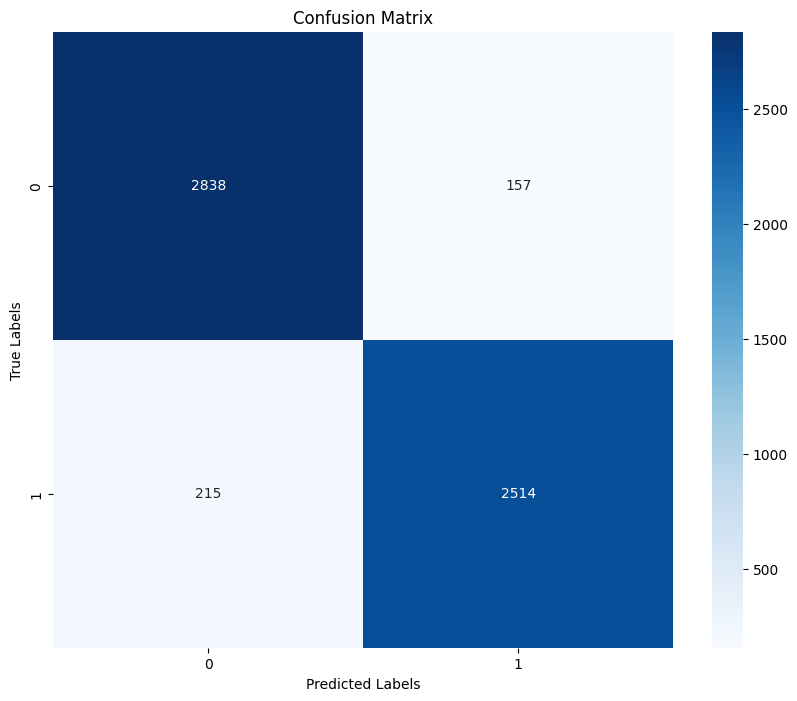

Confusion Matrix:
[[2838  157]
 [ 215 2514]]
Accuracy data is not available in the log history.


In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Evaluate model on test dataset
test_results = trainer.predict(test_dataset)

# Extract predictions and true labels
preds = np.argmax(test_results.predictions, axis=1)
true_labels = test_results.label_ids

# Calculate accuracy
test_accuracy = accuracy_score(true_labels, preds)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Plot confusion matrix
conf_matrix = confusion_matrix(true_labels, preds)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.show()

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

# Extract history for loss and accuracy
history = trainer.state.log_history

# Extract metrics for loss plotting
train_loss = [x['loss'] for x in history if 'loss' in x and 'epoch' in x]
eval_loss = [x['eval_loss'] for x in history if 'eval_loss' in x and 'epoch' in x]
epochs = sorted(list(set(int(x['epoch']) for x in history if 'epoch' in x)))

# Extract training and evaluation accuracy if available
train_accuracy = [x['accuracy'] for x in history if 'accuracy' in x and 'epoch' in x]
eval_accuracy = [x['eval_accuracy'] for x in history if 'eval_accuracy' in x and 'epoch' in x]

# Print and plot training/validation accuracy if available
if train_accuracy and eval_accuracy:
    # Adjust lengths to match epochs
    min_length = min(len(train_loss), len(eval_loss), len(epochs), len(train_accuracy), len(eval_accuracy))
    train_loss = train_loss[:min_length]
    eval_loss = eval_loss[:min_length]
    train_accuracy = train_accuracy[:min_length]
    eval_accuracy = eval_accuracy[:min_length]
    epochs = epochs[:min_length]

    # Plot loss
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_loss, label="Training Loss")
    plt.plot(epochs, eval_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()
    plt.show()

    # Plot accuracy
    plt.figure(figsize=(10, 5))
    plt.plot(epochs, train_accuracy, label="Training Accuracy")
    plt.plot(epochs, eval_accuracy, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()
    plt.show()

    # Print the last recorded accuracy for training and validation
    print(f"Final Training Accuracy: {train_accuracy[-1]:.4f}")
    print(f"Final Validation Accuracy: {eval_accuracy[-1]:.4f}")
else:
    print("Accuracy data is not available in the log history.")


In [ ]:
import requests
from bs4 import BeautifulSoup

def scrape_headlines(url):
    # Make the request and parse HTML
    response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"})
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # List to store extracted headlines
    headlines = []
    
    # Find all headline elements by tag and class
    for item in soup.find_all('h2', class_='sc-8ea7699c-3 kwWByH'):  #replace the respective heading tag and the class name
        headline = item.get_text().strip()
        if headline:
            headlines.append(headline)
    
    return headlines

# Example usage
news_url = 'https://www.bbc.com/news/topics/cj3ergr8209t'   # replace this link with your choice
headlines = scrape_headlines(news_url)
print("Headlines scraped:", headlines)




Headlines scraped: ['Trump picks Elon Musk and Fox News host for key jobs in second White House term', 'Trump lining up Marco Rubio and Kristi Noem for top jobs', 'Sign up here']


In [ ]:
# headlines = [
#     "Experts Say Ideal Work-Life Balance is Achieved By Working Every Weekend",
#     "Survey Finds Spending Time on Social Media Most Productive Way to Start the Day",
#     "Scientists Shocked to Discover Water is Wet, Results Pending Confirmation",
    
#     "Research Shows Regular Exercise Can Improve Mental Health",
#     "what to know regarding current treatments for ebola",
    
# ]


In [16]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch
from torch.nn.functional import softmax

# Load model and tokenizer
model_path = './sarcasm_detector'
tokenizer = BertTokenizer.from_pretrained(model_path)
model = BertForSequenceClassification.from_pretrained(model_path)
model.eval()




BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [17]:
def predict_sarcasm(headlines):
    predictions = []
    for headline in headlines:
        # Tokenize the headline
        inputs = tokenizer(headline, return_tensors="pt", truncation=True, padding=True, max_length=64)

        # Predict with BERT model
        with torch.no_grad():
            outputs = model(**inputs)

        # Softmax to get probability of each class
        probs = softmax(outputs.logits, dim=-1)
        label = torch.argmax(probs, dim=1).item()
        sarcasm_score = probs[0][1].item()  # Score for "sarcastic" class

        # Append the headline with its prediction
        predictions.append({
            'headline': headline,
            'is_sarcastic': bool(label),
            'sarcasm_score': sarcasm_score
        })
    return predictions

# Predict sarcasm on the scraped headlines
results = predict_sarcasm(headlines)

# Display the results
for result in results:
    print(f"Headline: {result['headline']}")
    print(f"Prediction: {'Sarcastic' if result['is_sarcastic'] else 'Not Sarcastic'}")
    print(f"Sarcasm Score: {result['sarcasm_score']:.2f}\n")



Headline: Experts Say Ideal Work-Life Balance is Achieved By Working Every Weekend
Prediction: Sarcastic
Sarcasm Score: 1.00

Headline: Survey Finds Spending Time on Social Media Most Productive Way to Start the Day
Prediction: Sarcastic
Sarcasm Score: 1.00

Headline: Scientists Shocked to Discover Water is Wet, Results Pending Confirmation
Prediction: Not Sarcastic
Sarcasm Score: 0.10

Headline: Research Shows Regular Exercise Can Improve Mental Health
Prediction: Not Sarcastic
Sarcasm Score: 0.00

Headline: what to know regarding current treatments for ebola
Prediction: Not Sarcastic
Sarcasm Score: 0.00

